In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(64,(3,3), input_shape = (64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
classifier.add(Flatten())

In [5]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [6]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255)
test_data = ImageDataGenerator(rescale = 1./255)

In [10]:
train_set = train_data.flow_from_directory('C:/Users/Subhadri/Desktop/Data Science/Term 2/Artificial Intelligence/Datasets/Cats & Dogs Case Study/train_set',
                                          target_size = (64,64), class_mode = 'binary')

Found 25000 images belonging to 2 classes.


In [11]:
train_set.class_indices

{'Cats': 0, 'Dogs': 1}

In [12]:
test_set = test_data.flow_from_directory('C:/Users/Subhadri/Desktop/Data Science/Term 2/Artificial Intelligence/Datasets/Cats & Dogs Case Study/test_set',
                                        target_size = (64,64), class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [13]:
classifier.fit_generator(train_set, epochs = 3, validation_data = test_set)


Epoch 1/3
782/782 [==============================] - 597s 763ms/step - loss: 0.5756 - accuracy: 0.6898 - val_loss: 0.2169 - val_accuracy: 0.7700
Epoch 2/3
782/782 [==============================] - 349s 447ms/step - loss: 0.4509 - accuracy: 0.7866 - val_loss: 0.6369 - val_accuracy: 0.8300
Epoch 3/3
782/782 [==============================] - 394s 504ms/step - loss: 0.3873 - accuracy: 0.8238 - val_loss: 0.1218 - val_accuracy: 0.8300


In [14]:
import numpy as np
from keras.preprocessing import image

In [23]:
test_image = image.load_img('C:/Users/Subhadri/Desktop/Data Science/Term 2/Artificial Intelligence/Datasets/Cats & Dogs Case Study/inference/dog.41.jpg',
                           target_size = (64,64))

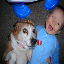

In [24]:
test_image

In [25]:
test_image = image.img_to_array(test_image)

In [26]:
test_image = test_image.reshape(1,64,64,3)

In [27]:
result = classifier.predict(test_image)

In [28]:
if result == 1:
    prediction = 'Cat'
else:
    prediction = 'Dog'

In [29]:
prediction

'Dog'